# A simple implementation of gradient descent
- 梯度下降法的简单应用
- 不同的 learning rate 和步数对学习效果的影响

LINKs Back:
[WIKI: ML Neural Network #Learning](../_posts/0004%20Machine%20Learning/0004-05-01-neural%20network.md)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import copy

%matplotlib inline

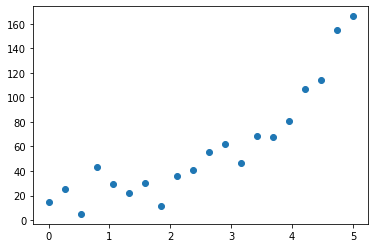

In [7]:
x_data = np.linspace(0, 5, 20)
y_data = x_data**3 + 50*np.random.rand(20)
plt.scatter(x_data, y_data)

## 1. Define loss & gradient function
Squared-error from the i^th data point is $E(w0, w1, w2, w3, i)^2$

$$E(w0, w1, w2, w3, i) = w0 + w1*x[i] + w2*x[i]^2 + w3*x[i]^3 - y[i]$$

The derivative with respect to
- w0: $2E(w0, w1, w2, w3, i)$
- w1 is $2E(w0, w1, w2, w3, i)*x[i]$
- w2 is $2E(w0, w1, w2, w3, i)*x[i]^2$
- w3 is $2E(w0, w1, w2, w3, i)*x[i]^3$

Thus, the gradient is $2E(w0, w1, w2, w3, i)*(1, x[i], x[i]^2, x[i]^3)$


In [8]:
def ComputeError(w, x_i, y_i):
    return (w[0] + w[1]*x_i + w[2]*x_i**2 + w[3]*x_i**3 - y_i)**2

def ComputeGradient(w, x_i, y_i):
    return 2*(w[0] + w[1]*x_i + w[2]*x_i**2 + w[3]*x_i**3 - y_i)*np.array([1, x_i, x_i**2, x_i**3])

## 2. Define function to update weights

In [9]:
def update_weights(learning_rate, steps):
    weights = copy.deepcopy(initial_weights)
    all_steps = []
    all_errors = []
    for step in range(steps):
        error = sum([ComputeError(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
        
        # Store the values
        all_steps.append(step)
        all_errors.append(error)
        
        gradient = sum([ComputeGradient(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
        # Normalize the gradient to be the size of the learn rate
        gradient = learning_rate  * gradient/np.sqrt(sum([g**2 for g in gradient]))
        
        # Update weights
        weights -= gradient
    return all_steps, all_errors, weights

In [10]:
### Assume a polynomial fit with 3 degree i.e. y = w0 + w1*x + w2*x^2 + w3*x^3
initial_weights = np.random.rand(4)

## Try 1: learn_rate=0.001, steps = 100

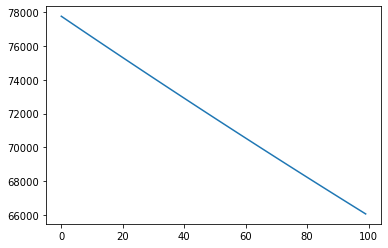

In [11]:
all_steps, all_errors, weights = update_weights(learning_rate=0.001, steps=100)

### Plot the error over time
plt.plot(all_steps, all_errors)

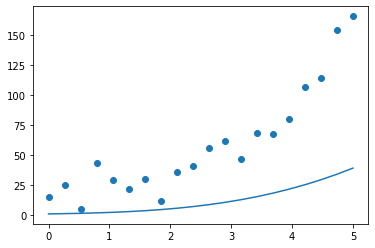

In [12]:
### Compare the original data with the fit.
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)

Clearly the model didn't train very well because the error is still high. Let's try again with a bigger learn rate.

## Try 2: learn_rate=0.01, steps=100

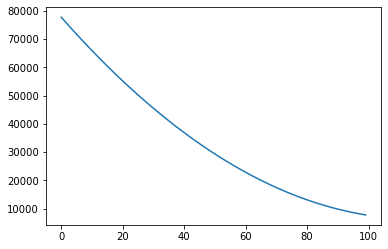

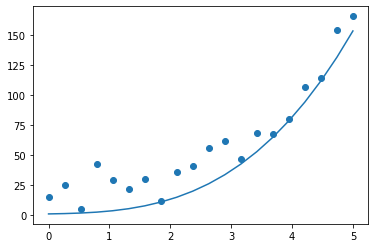

In [14]:
### Try again with a bigger learn rate.
all_steps, all_errors, weights = update_weights(learning_rate=0.01, steps=100)

# Show the error
plt.plot(all_steps, all_errors)
plt.show()

# Show the model
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()

## Try 3: learn_rate=0.01, steps=1000

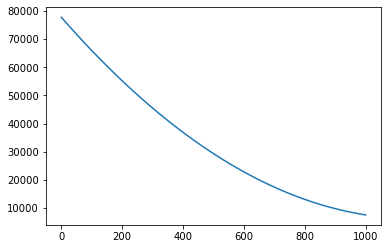

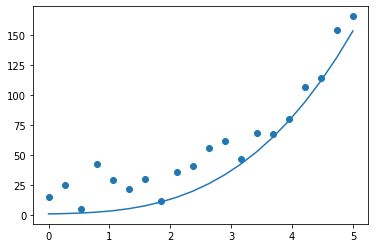

In [16]:
### This looks better, but let's try training it for 1000 steps instead of 100.

all_steps, all_errors, weights = update_weights(learning_rate=0.001, steps=1000)
    
# Show the error
plt.plot(all_steps, all_errors)
plt.show()

# Show the model
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()

## Try 4: learn_rate=1, steps=10

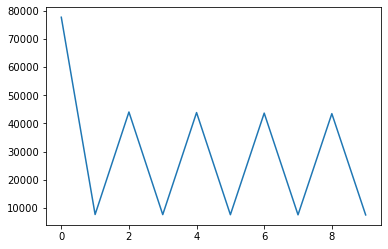

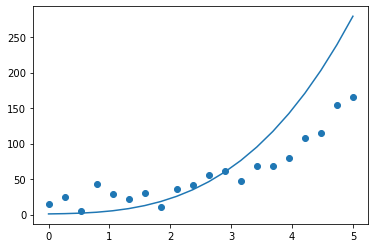

In [17]:
### As a final test, let's try this with a large learn rate for only a few steps.

all_steps, all_errors, weights = update_weights(learning_rate=1, steps=10)

# Show the error
plt.plot(all_steps, all_errors)
plt.show()

# Show the model
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()